In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1
)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1
)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 9s 20ms/step - loss: 0.6184 - accuracy: 0.8098 - val_loss: 0.2923 - val_accuracy: 0.9186
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2541 - accuracy: 0.9216 - val_loss: 0.1961 - val_accuracy: 0.9427
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1664 - accuracy: 0.9490 - val_loss: 0.1486 - val_accuracy: 0.9569
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.1504 - val_accuracy: 0.9530
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0863 - accuracy: 0.9726 - val_loss: 0.1386 - val_accuracy: 0.9588
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.1188 - val_accuracy: 0.9651
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.1190 - val_accuracy: 0.9682

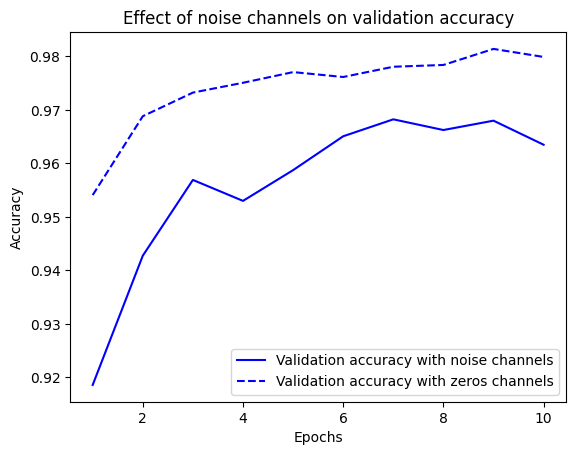

In [5]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3151 - accuracy: 0.1037 - val_loss: 2.3049 - val_accuracy: 0.1123
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2997 - accuracy: 0.1170 - val_loss: 2.3072 - val_accuracy: 0.1069
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2907 - accuracy: 0.1274 - val_loss: 2.3123 - val_accuracy: 0.1012
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2802 - accuracy: 0.1392 - val_loss: 2.3232 - val_accuracy: 0.1033
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2649 - accuracy: 0.1519 - val_loss: 2.3306 - val_accuracy: 0.1036
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2459 - accuracy: 0.1651 - val_loss: 2.3464 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2239 - accuracy: 0.1757 - val_loss: 2.3550 - val_accuracy: